# Milestones 3
## PAA & SAX
### Prepared by:
HAFIFI BIN YAHYA - WQD170042                                          
NOR ASMIDAH BINTI MOHD ARSHAD - WQD180006                             
MAS RAHAYU BINTI MOHAMAD - WQD180048                                  
LEE CHUN MUN - WQD180066                                              
JOJIE ANAK NANJU - WQD180029 

#### Remark: Prior running the script, please make sure your personal machine is installed with pyts version 0.6.

In [34]:
import pyts
print("Your pyts version is", pyts.__version__)

#print(dir(pyts),'\n')                    # for debugging purpose. 
#print(dir(pyts.transformation),'\n')     # for debugging purpose.


Your pyts version is 0.6


In [35]:
# Importing related packages or libraries.

import pandas as pd
import numpy as np
import os
import tslearn


In [36]:
# Load stock data (EOD) for all "Telecommunications & Media" companies that listed in KLSE Main Board.
# The data is obtained from the scraping activities during Milestone 1 and 2. 
# In this Milestone 3, we will loaded the data to stock dataframe for analysis.

list_of_companies = ['Amtel_Telco', 'AsiaMedia_Media', 'Astro_Media', 'Axiata_Telco', 'BerjayaMedia_Media', 'Digi_Telco',
                     'EcoBuilt_Media', 'GreenPacket_Telco', 'Maxis_Telco', 'MediaChineseInternational_Media', 'MediaPrima_Media',
                     'OCKGroup_Telco', 'Pelangi_Media', 'Sasbadi_Media', 'SeniJaya_Media', 'Star_Media', 'TimeDotCom_Telco',
                     'TM_Telco', 'Utusan_Media']

stock = pd.DataFrame({"Date":[],"Price":[],"Open":[],"High":[],"Low":[],"Volume":[],"Change%":[],"Company":[]})
stock = stock.set_index('Date')

# Loaded all stock information for respective companies to stock dataframe.
for company in list_of_companies:
    path = "Data/" + company + ".csv"
    df = pd.read_csv(path, sep=",", header=0, parse_dates=[0])
    df.columns =["Date","Price","Open","High","Low","Volume","Change%"]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df["Company"] = company
    stock = stock.append(df)

stock.head(10)


,Price,Open,High,Low,Volume,Change%,Company
Date,,,,,,,
2019-03-22,0.665,0.665,0.665,0.665,1.00K,0.00%,Amtel_Telco
2019-03-21,0.665,0.680,0.680,0.665,2.00K,0.00%,Amtel_Telco
2019-03-13,0.665,0.665,0.665,0.665,2.60K,0.00%,Amtel_Telco
2019-03-11,0.665,0.665,0.665,0.665,3.50K,0.00%,Amtel_Telco
2019-03-05,0.665,0.660,0.665,0.660,309.50K,1.53%,Amtel_Telco
2019-02-25,0.655,0.655,0.655,0.655,1.00K,0.00%,Amtel_Telco
2019-02-19,0.655,0.655,0.700,0.655,21.60K,0.00%,Amtel_Telco
2019-02-18,0.655,0.655,0.655,0.655,1.30K,0.00%,Amtel_Telco
2019-02-15,0.655,0.655,0.655,0.655,1.00K,0.00%,Amtel_Telco


In [37]:
# Rearrange columns.

stock = stock[['High','Low','Open','Price','Volume','Change%','Company']]
cols = list(stock.columns.values)
print(cols)


['High', 'Low', 'Open', 'Price', 'Volume', 'Change%', 'Company']


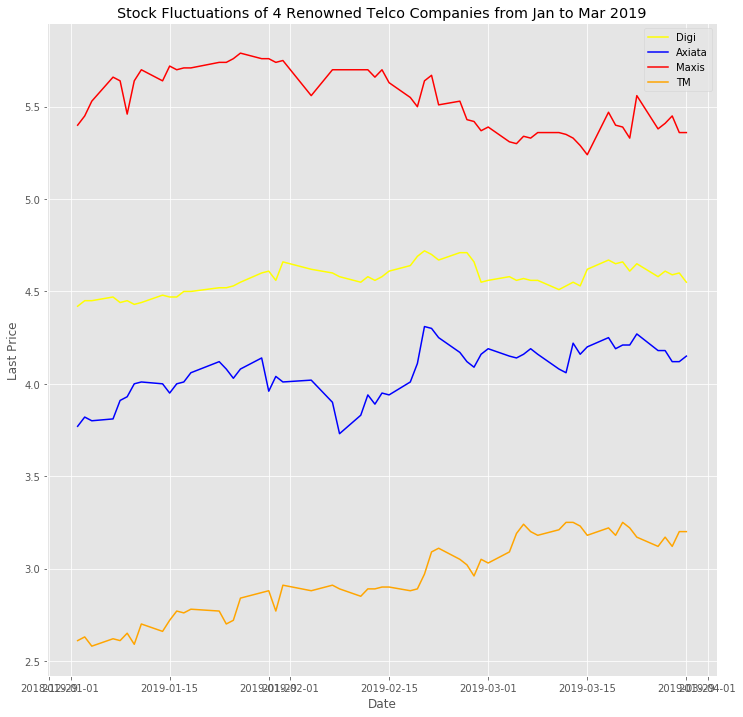

In [38]:
# Basic visualization for unscaled data.
# Here, we shall showing visualization for a 4 telco companies - Digi, Axiata, Maxis and TM.
# To view visualization for other companies, just change the company name from the code.

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

Digi = stock.loc[stock['Company'] == 'Digi_Telco']
Digi_Price = Digi['Price']
#print(Digi_Price.shape)         # for debugging purpose.

Axiata = stock.loc[stock['Company'] == 'Axiata_Telco']
Axiata_Price = Axiata['Price']
#print(Axiata_Price.shape)       # for debugging purpose.

Maxis = stock.loc[stock['Company'] == 'Maxis_Telco']
Maxis_Price = Maxis['Price']
#print(Maxis_Price.shape)        # for debugging purpose.

TM = stock.loc[stock['Company'] == 'TM_Telco']
TM_Price = TM['Price']
#print(TM_Price.shape)           # for debugging purpose. 

plt.plot(Digi_Price, color='yellow', label='Digi')
plt.plot(Axiata_Price, color='blue', label='Axiata')
plt.plot(Maxis_Price, color='red', label='Maxis')
plt.plot(TM_Price, color='orange', label='TM')
plt.xlabel("Date")
plt.ylabel('Last Price')
plt.title('Stock Fluctuations of 4 Renowned Telco Companies from Jan to Mar 2019')

plt.legend(loc='upper right')


In [39]:
# Before proceed with PAA and SAX, the data need to be normalized (scaled).
# Performing z-scale to the imported time-series stock data.

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 

Digi_Scaled = scaler.fit_transform(Digi_Price)
Axiata_Scaled = scaler.fit_transform(Axiata_Price)
Maxis_Scaled = scaler.fit_transform(Maxis_Price)
TM_Scaled = scaler.fit_transform(TM_Price)


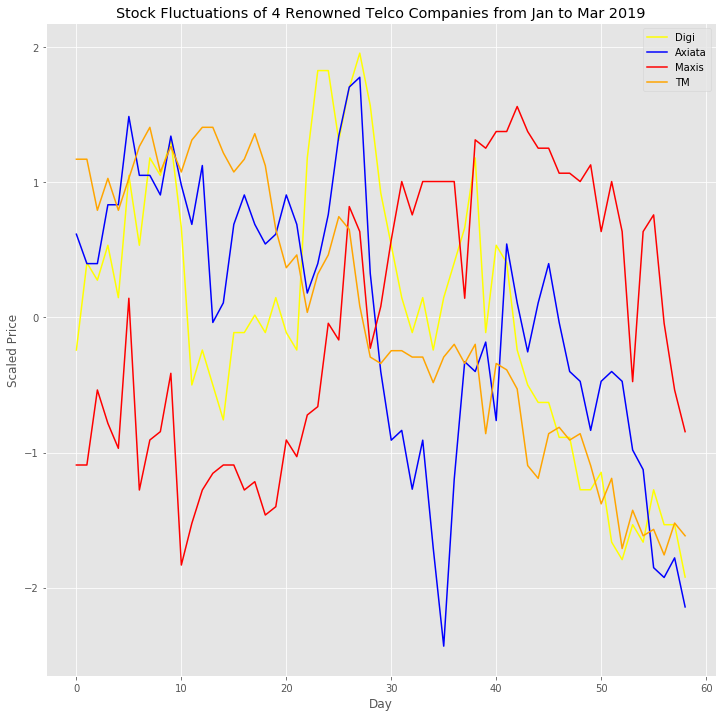

In [40]:
# Plotting the stock variation based from the (normalized) scaled price data.

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

plt.plot(Digi_Scaled[0], color='yellow', label='Digi')
plt.plot(Axiata_Scaled[0], color='blue', label='Axiata')
plt.plot(Maxis_Scaled[0], color='red', label='Maxis')
plt.plot(TM_Scaled[0], color='orange', label='TM')

plt.xlabel("Day")
plt.ylabel('Scaled Price')
plt.title('Stock Fluctuations of 4 Renowned Telco Companies from Jan to Mar 2019')
plt.legend(loc='upper right')

In [41]:
# Performing PAA and SAX.

from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

n_paa_segments = 8
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
Digi_PAA_n8 = paa.inverse_transform(paa.fit_transform(Digi_Scaled))

n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
Digi_SAX_n8 = sax.inverse_transform(sax.fit_transform(Digi_Scaled))

n_paa_segments = 16
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
Digi_PAA_n16 = paa.inverse_transform(paa.fit_transform(Digi_Scaled))

n_sax_symbols = 16
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
Digi_SAX_n16 = sax.inverse_transform(sax.fit_transform(Digi_Scaled))


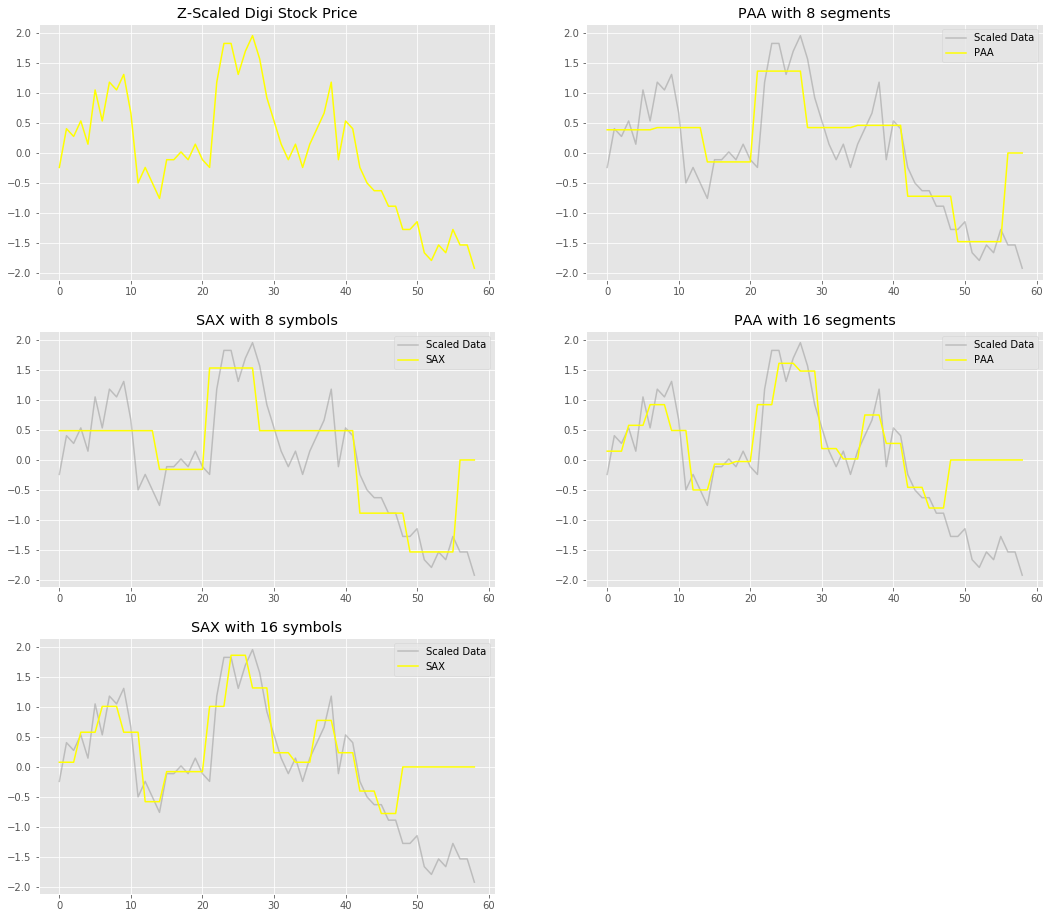

In [42]:
# Visualize the PAA and SAX with different segments and symbols.

plt.figure(figsize=(18,16))

plt.subplot(3, 2, 1)  # First, raw time series
plt.plot(Digi_Scaled[0].ravel(), "yellow")
plt.title("Z-Scaled Digi Stock Price")

plt.subplot(3, 2, 2)  # Second, PAA
plt.plot(Digi_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Digi_PAA_n8[0].ravel(), "yellow", label='PAA')
plt.title("PAA with 8 segments")
plt.legend(loc='upper right')

plt.subplot(3, 2, 3)  # Then SAX
plt.plot(Digi_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Digi_SAX_n8[0].ravel(), "yellow", label='SAX')
plt.title("SAX with 8 symbols")
plt.legend(loc='upper right')

plt.subplot(3, 2, 4)  # Second, PAA
plt.plot(Digi_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Digi_PAA_n16[0].ravel(), "yellow", label='PAA')
plt.title("PAA with 16 segments")
plt.legend(loc='upper right')

plt.subplot(3, 2, 5)  # Then SAX
plt.plot(Digi_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Digi_SAX_n16[0].ravel(), "yellow", label='SAX')
plt.title("SAX with 16 symbols")
plt.legend(loc='upper right')




In [43]:
# Performing PAA and SAX for other stock - Maxis.

from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

n_paa_segments = 8
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
Maxis_PAA_n8 = paa.inverse_transform(paa.fit_transform(Maxis_Scaled))

n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
Maxis_SAX_n8 = sax.inverse_transform(sax.fit_transform(Maxis_Scaled))

n_paa_segments = 16
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
Maxis_PAA_n16 = paa.inverse_transform(paa.fit_transform(Maxis_Scaled))

n_sax_symbols = 16
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
Maxis_SAX_n16 = sax.inverse_transform(sax.fit_transform(Maxis_Scaled))


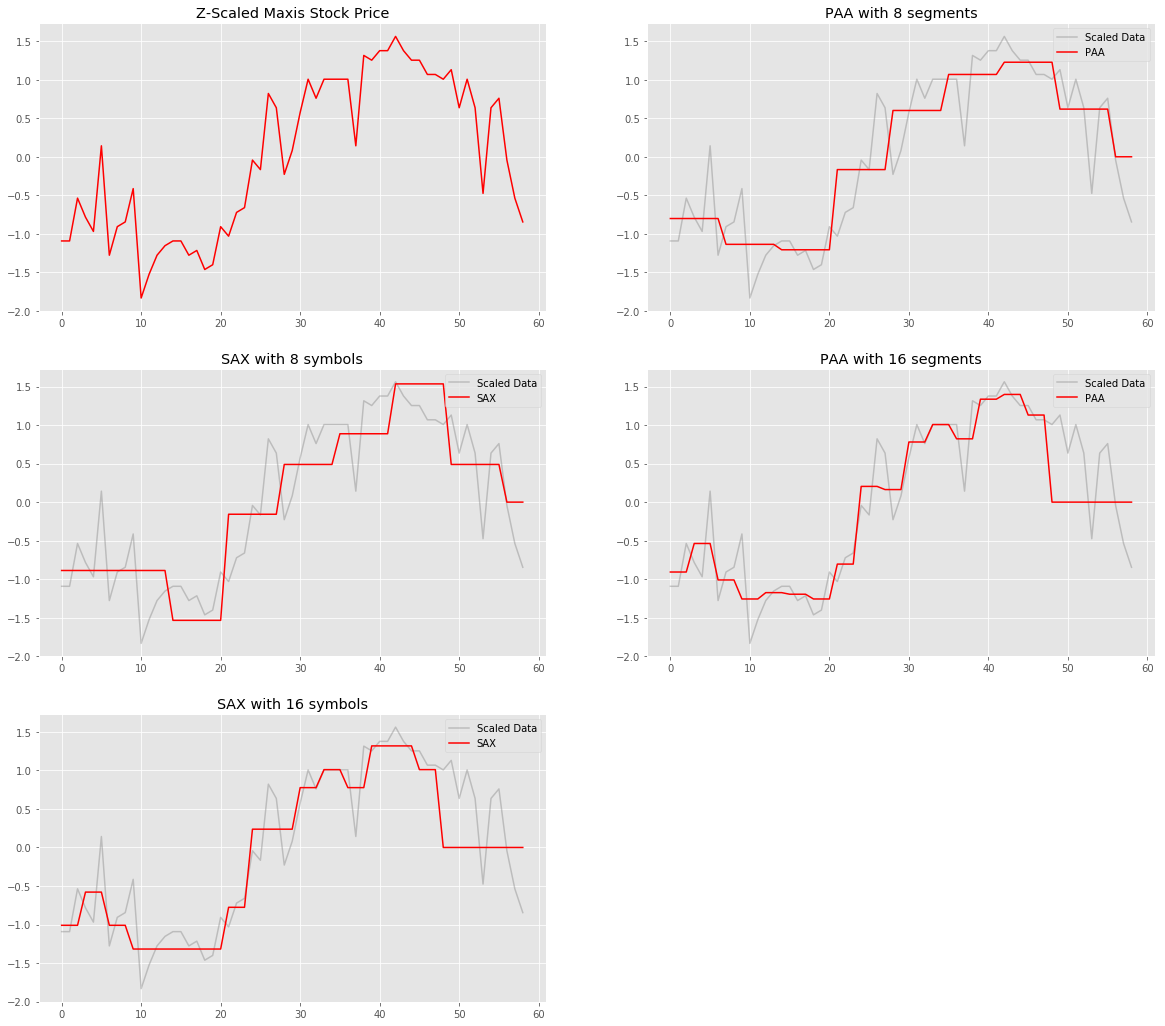

In [44]:
# Visualize the PAA and SAX with different segments and symbols - for Maxis.

plt.figure(figsize=(20,18))

plt.subplot(3, 2, 1)  # First, raw time series
plt.plot(Maxis_Scaled[0].ravel(), "red")
plt.title("Z-Scaled Maxis Stock Price")

plt.subplot(3, 2, 2)  # Second, PAA
plt.plot(Maxis_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Maxis_PAA_n8[0].ravel(), "red", label='PAA')
plt.title("PAA with 8 segments")
plt.legend(loc='upper right')

plt.subplot(3, 2, 3)  # Then SAX
plt.plot(Maxis_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Maxis_SAX_n8[0].ravel(), "red", label='SAX')
plt.title("SAX with 8 symbols")
plt.legend(loc='upper right')

plt.subplot(3, 2, 4)  # Second, PAA
plt.plot(Maxis_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Maxis_PAA_n16[0].ravel(), "red", label='PAA')
plt.title("PAA with 16 segments")
plt.legend(loc='upper right')

plt.subplot(3, 2, 5)  # Then SAX
plt.plot(Maxis_Scaled[0].ravel(), "grey", alpha=0.4, label='Scaled Data')
plt.plot(Maxis_SAX_n16[0].ravel(), "red", label='SAX')
plt.title("SAX with 16 symbols")
plt.legend(loc='upper right')


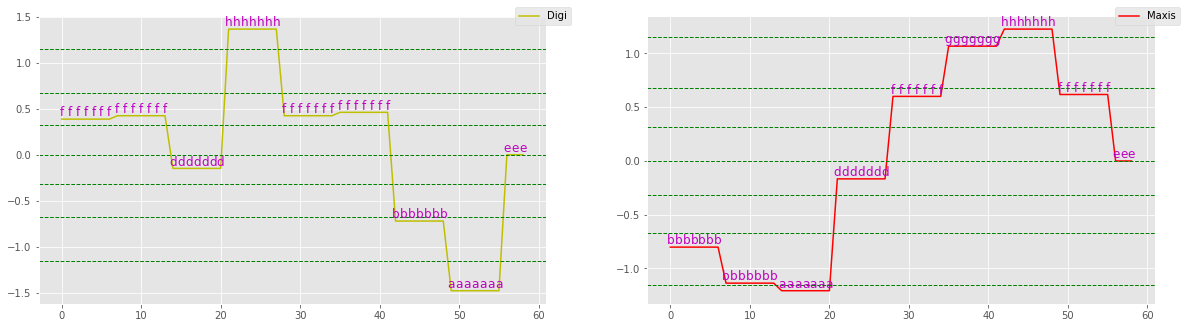

In [45]:
# Putting breakpoints to PAA and SAX visualization.

from __future__ import division
from __future__ import unicode_literals
from __future__ import print_function
from __future__ import absolute_import
from builtins import range
from future import standard_library
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from pyts.utils import paa, sax, gaf, mtf, dtw, fast_dtw, recurrence_plot

n_bins = 8
tss = [Digi_PAA_n8[0],Maxis_PAA_n8[0]]
colors = ["y","r","b","c","m"]
labels = ["Digi","Maxis"]
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"


fig = plt.figure(figsize=(20,18))

for ts,color,label,e in zip(tss,colors,labels,range(5)):   
    ax =  fig.add_subplot(3,2,1+e)
    #for the break point formula
    quantiles = scipy.stats.norm.ppf(np.linspace(0, 1, num=n_bins + 1)[1:])
    ts_sax = sax(ts, n_bins, quantiles, alphabet, plot=True)
    plt.plot(ts, color=color,label=label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=5, borderaxespad=0.)
    
    #for the break point visualization
    for i in range(n_bins - 1):
        plt.axhline(y=quantiles[i], ls='--', lw=1, color='g')

    if 1:
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        for i in range(len(ts_sax)):
            x_pos = (i - x_lim[0]) / (x_lim[1] - x_lim[0])
            y_pos = (ts[i] - y_lim[0]) / (y_lim[1] - y_lim[0])
            ax.text(x_pos, y_pos, ts_sax[i],
                    horizontalalignment='center', verticalalignment='bottom',
                    transform=ax.transAxes, color='m', fontsize=12)
plt.show()